In [47]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import json
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
# import sklearn.cluster.hierarchical as hclust
from sklearn import preprocessing
import seaborn as sns

# import data 

In [ ]:
DATA_FILE = "/gdrive/MyDrive/colab/data.json"
DUMP_FILE = "/gdrive/MyDrive/colab/dump.pkl"

store_columns = (
    "id",  # 음식점 고유번호
    "store_name",  # 음식점 이름
    "branch",  # 음식점 지점 여부
    "area",  # 음식점 위치
    "tel",  # 음식점 번호
    "address",  # 음식점 주소
    "latitude",  # 음식점 위도
    "longitude",  # 음식점 경도
    "category",  # 음식점 카테고리
)

review_columns = (
    "id",  # 리뷰 고유번호
    "store",  # 음식점 고유번호
    "user",  # 유저 고유번호
    "score",  # 평점
    "content",  # 리뷰 내용
    "reg_time",  # 리뷰 등록 시간
)

menu_columns = (
    "id",
    "store",
    "menu_name",
    "price",
)

user_columns = (
    "id",
    "gender",
    "age",
)


def import_data(data_path=DATA_FILE):
    try:
        with open(data_path, encoding="utf-8") as f:
            data = json.loads(f.read())
    except FileNotFoundError as e:
        print(f"`{data_path}` 가 존재하지 않습니다.")
        exit(1)

    stores = []  # 음식점 테이블
    reviews = []  # 리뷰 테이블
    menus = [] # 메뉴 테이블
    users = [] # 유저 테이블
    menu_id = 0

    for d in data:
        categories = [c["category"] for c in d["category_list"]]
        category = "알수없음"
        if len(categories) > 0:
          category = categories[0]

        stores.append(
            [
                d["id"],
                d["name"],
                d["branch"],
                d["area"],
                d["tel"],
                d["address"],
                d["latitude"],
                d["longitude"],
                category,
            ]
        )

        for review in d["review_list"]:
            r = review["review_info"]
            u = review["writer_info"]
            user_age = 2021 - int(u["born_year"]) + 1

            reviews.append(
                [r["id"], d["id"], u["id"], r["score"], r["content"], r["reg_time"]]
            )
            users.append(
                [u["id"], u["gender"], user_age]
            )

        for menu in d["menu_list"]:
            menus.append(
                [menu_id, d["id"], menu["menu"], menu["price"]]
            )
            menu_id +=1

    store_frame = pd.DataFrame(data=stores, columns=store_columns)
    review_frame = pd.DataFrame(data=reviews, columns=review_columns)
    memu_frame = pd.DataFrame(data=menus, columns=menu_columns)
    user_frame = pd.DataFrame(data=users, columns=user_columns)

    store_frame["category"].replace("", "알수없음", inplace=True)

    return {"stores": store_frame, "reviews": review_frame, "menus": memu_frame, "users":user_frame}


def dump_dataframes(dataframes):
    pd.to_pickle(dataframes, DUMP_FILE)


def load_dataframes():
    return pd.read_pickle(DUMP_FILE)


print("[*] Parsing data...")
raw_data = import_data()
print("[+] Done")

print("[*] Dumping data...")
dump_dataframes(raw_data)
print("[+] Done\n")

raw_data = load_dataframes()

[*] Parsing data...
[+] Done
[*] Dumping data...
[+] Done



In [ ]:
MUSLIM_PATH = '/gdrive/MyDrive/colab/무슬림친화레스토랑.csv'
CSV_MUSLIM_PATH = pd.read_csv(MUSLIM_PATH, engine='python', encoding='cp949')
print(CSV_MUSLIM_PATH["주소"].head())

0       서울 용산구 우사단로 34 
1       서울 용산구 우사단로 42 
2     부산 금정구 금단로 123-9 
3        인천 연수구 옥련로 31 
4    경남 창원시 성산구 용지로 74 
Name: 주소, dtype: object


In [ ]:
MUSLIM_SEOUL_PATH = '/gdrive/MyDrive/colab/무슬림서울만.csv'
CSV_MUSLIM_SEOUL = pd.read_csv(MUSLIM_SEOUL_PATH, engine='python', encoding='cp949')
print(CSV_MUSLIM_SEOUL.head())

   idx store_name                            address category
0    0      우스마니아              서울특별시 용산구 이태원동 137-56   파키스탄음식
1    1  미스터케밥 2호점              서울특별시 용산구 이태원동 136-45     터키음식
2    7        미가미     서울특별시 서초구 서초동 1337-32 서초동 광일빌딩       일식
3    8       패밀리아  서울특별시 강남구 논현동 248-7 임피리얼 팰리스호텔 1층      뷔페식
4    9         깔리                 서울특별시 종로구 명륜4가 171     인도음식


In [ ]:
MUSLIM_REVIEW_PATH = '/gdrive/MyDrive/colab/무슬림리뷰만.csv'
CSV_MUSLIM_REVIEW = pd.read_csv(MUSLIM_REVIEW_PATH, engine='python', encoding='cp949')
print(CSV_MUSLIM_REVIEW.head())

  store_name   store
0      우스마니아  308561
1        미가미  155677
2       패밀리아  430186
3         깔리   55195
4      세븐스퀘어  224459


In [ ]:
MYDF_PATH = '/gdrive/MyDrive/colab/MyDF11.csv'
CSV_MYDF = pd.read_csv(MYDF_PATH, engine='python', encoding='cp949')
print(CSV_MYDF.info())
copied_df = CSV_MYDF.copy(deep=True)
copied_df = copied_df[copied_df.id.notnull()]
print(copied_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       134 non-null    int64  
 1   id_store_img_1   134 non-null    int64  
 2   id_store_img_2   134 non-null    int64  
 3   id_store_img_3   134 non-null    int64  
 4   id_store         134 non-null    int64  
 5   store_name       134 non-null    object 
 6   address_x        134 non-null    object 
 7   id               60 non-null     float64
 8   address_y        60 non-null     object 
 9   category         134 non-null    object 
 10  muslim_friendly  134 non-null    object 
 11  tel              134 non-null    object 
 12  working_time     134 non-null    object 
 13  day_closed       85 non-null     object 
 14  parking          134 non-null    object 
 15  attractions      134 non-null    object 
 16  active           134 non-null    int64  
 17  image0          

# 전처리

 userID, storeID, rating, title 로 만들기

In [ ]:
#skD
raw_store_table = raw_data["stores"].copy()
store_table = raw_store_table[['id', 'store_name','address']]

raw_review_table = raw_data["reviews"].copy()
review_table = raw_review_table[['store','user','score']]

raw_user_table = raw_data["users"].copy()
user_table = raw_user_table[['id','gender','age']]

#muD
raw_muslim_table = CSV_MUSLIM_SEOUL.copy()
muslim_table = raw_muslim_table[["store_name",'address']]
# muslim_table.columns = ['store_name','M_address']
raw_muslim_review = CSV_MUSLIM_REVIEW.copy()

In [ ]:
# 리뷰 테이블의 store id 159620, 159622 -> 159619
review_table["store"].replace(159620, 159619, inplace=True)
review_table["store"].replace(159622, 159619, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
review_table[(review_table["store"] == 159620) | (review_table["store"] == 159622)] # 159620, 159622

,store,user,score


In [ ]:
muslim_review_table = pd.merge(raw_muslim_review, review_table, on='store', how='left')
print(muslim_review_table.shape)
muslim_review_table.head(20)

(129, 4)


,store_name,store,user,score
0,우스마니아,308561,225842.0,4.0
1,우스마니아,308561,90292.0,4.0
2,미가미,155677,52663.0,5.0
3,패밀리아,430186,NaN,NaN
4,깔리,55195,442382.0,5.0
5,깔리,55195,688218.0,4.0
6,깔리,55195,816257.0,5.0
7,깔리,55195,510431.0,3.0
8,깔리,55195,362703.0,5.0
9,깔리,55195,213564.0,4.0


In [ ]:
muslim_store_table.to_csv('/gdrive/MyDrive/Colab Notebooks/ssafy/MyDF2.csv',encoding="utf-8-sig")

In [ ]:
store_table.head()

,id,store_name,address
0,1,Agal,서울특별시 마포구 동교동 170-13
1,2,Assisy,광주광역시 서구 농성동 631-33
2,3,Battered Sole,서울특별시 용산구 이태원동 118-9
3,4,Chakyoung,부산광역시 해운대구 중2동 1509-5
4,5,Delabobo,서울특별시 강서구 등촌동 689


# 음식점 clustering

## 음식점 데이터 가져오기

In [ ]:
MYDF_PATH = '/gdrive/MyDrive/colab/MyDF11.csv'
CSV_MYDF = pd.read_csv(MYDF_PATH, engine='python', encoding='cp949')
CSV_MYDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       134 non-null    int64 
 1   id_store_img_1   134 non-null    int64 
 2   id_store_img_2   134 non-null    int64 
 3   id_store_img_3   134 non-null    int64 
 4   id_store         134 non-null    int64 
 5   store_name       134 non-null    object
 6   address_x        134 non-null    object
 7   id               134 non-null    int64 
 8   address_y        60 non-null     object
 9   category         134 non-null    object
 10  muslim_friendly  134 non-null    object
 11  tel              134 non-null    object
 12  working_time     134 non-null    object
 13  day_closed       85 non-null     object
 14  parking          134 non-null    object
 15  attractions      134 non-null    object
 16  active           134 non-null    int64 
 17  image0           134 non-null    ob

## 필요한 특성 뽑아내기

In [ ]:
copied_df = CSV_MYDF.copy(deep=True)[["id_store", "id", "category", "address_x"]]
copied_df.columns = ["id_store", "id_store_SKD", "category", "address"]
copied_df.head()

,id_store,id_store_SKD,category,address
0,1,308561,인도음식,서울특별시 용산구 이태원동 137-56
1,3,155677,일식,서울특별시 서초구 서초동 1337-32 서초동 광일빌딩
2,5,430186,뷔페식,서울특별시 강남구 논현동 248-7 임피리얼 팰리스호텔 1층
3,6,55195,인도음식,서울특별시 종로구 명륜4가 171
4,9,224459,뷔페식,서울특별시 중구 태평로2가 23 더 플라자 2층


### 카테고리

In [ ]:
print(copied_df.category.value_counts(), "\n counts:", copied_df.category.value_counts().sum())

인도음식     47
한식       30
양식       19
터키음식      9
아시아음식     8
뷔페식       7
일식        7
카페        3
중식        2
샌드위치      1
베이커리      1
Name: category, dtype: int64 
 counts: 134


In [ ]:
copied_df["col_인도음식"] = copied_df["category"].apply(lambda x: 1 if x=='인도음식' else 0 )
copied_df["col_한식"] = copied_df["category"].apply(lambda x: 1 if x=='한식' else 0 )
copied_df["col_양식"] = copied_df["category"].apply(lambda x: 1 if x=='양식' else 0 )
copied_df["col_터키음식"]  = copied_df["category"].apply(lambda x: 1 if x=='터키음식' else 0 )
copied_df["col_아시아음식"] = copied_df["category"].apply(lambda x: 1 if x=='아시아음식' else 0 )
copied_df["col_일식"] = copied_df["category"].apply(lambda x: 1 if x=='일식' else 0 )
copied_df["col_뷔페식"] = copied_df["category"].apply(lambda x: 1 if x=='뷔페식' else 0 )
copied_df["col_카페"] = copied_df["category"].apply(lambda x: 1 if x=='카페' else 0 )
copied_df["col_중식"] = copied_df["category"].apply(lambda x: 1 if x=='중식' else 0 )

In [ ]:
copied_df

,id_store,id_store_SKD,category,address,col_인도음식,col_한식,col_양식,col_터키음식,col_아시아음식,col_일식,col_뷔페식,col_카페,col_중식
0,1,308561.0,인도음식,서울특별시 용산구 이태원동 137-56,1,0,0,0,0,0,0,0,0
1,3,155677.0,일식,서울특별시 서초구 서초동 1337-32 서초동 광일빌딩,0,0,0,0,0,1,0,0,0
2,5,430186.0,뷔페식,서울특별시 강남구 논현동 248-7 임피리얼 팰리스호텔 1층,0,0,0,0,0,0,1,0,0
3,6,55195.0,인도음식,서울특별시 종로구 명륜4가 171,1,0,0,0,0,0,0,0,0
4,9,224459.0,뷔페식,서울특별시 중구 태평로2가 23 더 플라자 2층,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,480,NaN,아시아음식,서울특별시 용산구 한남동 763-15,0,0,0,0,1,0,0,0,0
130,481,431920.0,양식,서울특별시 용산구 이태원동 552 2층 페트라 레스토랑,0,0,1,0,0,0,0,0,0
131,482,149007.0,양식,서울특별시 용산구 용산동2가 45-9,0,0,1,0,0,0,0,0,0
132,485,391627.0,양식,서울특별시 용산구 용산동2가 44-7,0,0,1,0,0,0,0,0,0


In [ ]:
copied_df.drop("category", 'columns', inplace=True)
copied_df

,id_store,id_store_SKD,address,col_인도음식,col_한식,col_양식,col_터키음식,col_아시아음식,col_일식,col_뷔페식,col_카페,col_중식
0,1,308561.0,서울특별시 용산구 이태원동 137-56,1,0,0,0,0,0,0,0,0
1,3,155677.0,서울특별시 서초구 서초동 1337-32 서초동 광일빌딩,0,0,0,0,0,1,0,0,0
2,5,430186.0,서울특별시 강남구 논현동 248-7 임피리얼 팰리스호텔 1층,0,0,0,0,0,0,1,0,0
3,6,55195.0,서울특별시 종로구 명륜4가 171,1,0,0,0,0,0,0,0,0
4,9,224459.0,서울특별시 중구 태평로2가 23 더 플라자 2층,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129,480,NaN,서울특별시 용산구 한남동 763-15,0,0,0,0,1,0,0,0,0
130,481,431920.0,서울특별시 용산구 이태원동 552 2층 페트라 레스토랑,0,0,1,0,0,0,0,0,0
131,482,149007.0,서울특별시 용산구 용산동2가 45-9,0,0,1,0,0,0,0,0,0
132,485,391627.0,서울특별시 용산구 용산동2가 44-7,0,0,1,0,0,0,0,0,0


### 주소의 구

In [ ]:
copied_df["area"] = copied_df["address"].str.split(" ").str[1]
copied_df

,id_store,id_store_SKD,category,address,area
0,1,308561,인도음식,서울특별시 용산구 이태원동 137-56,용산구
1,3,155677,일식,서울특별시 서초구 서초동 1337-32 서초동 광일빌딩,서초구
2,5,430186,뷔페식,서울특별시 강남구 논현동 248-7 임피리얼 팰리스호텔 1층,강남구
3,6,55195,인도음식,서울특별시 종로구 명륜4가 171,종로구
4,9,224459,뷔페식,서울특별시 중구 태평로2가 23 더 플라자 2층,중구
...,...,...,...,...,...
129,480,460073,아시아음식,서울특별시 용산구 한남동 763-15,용산구
130,481,431920,양식,서울특별시 용산구 이태원동 552 2층 페트라 레스토랑,용산구
131,482,149007,양식,서울특별시 용산구 용산동2가 45-9,용산구
132,485,391627,샌드위치,서울특별시 용산구 용산동2가 44-7,용산구


In [ ]:
# 구 확인
copied_df.area.value_counts()

용산구     28
중구      28
종로구     22
마포구     11
강남구     10
서대문구     6
서초구      5
영등포구     4
강서구      4
구로구      3
성북구      3
관악구      2
송파구      2
동대문구     2
성동구      1
양천구      1
강동구      1
강북구      1
Name: area, dtype: int64

In [ ]:
copied_df["area_용산구"] = copied_df["area"].apply(lambda x: 1 if x=='용산구' else 0 )
copied_df["area_중구"] = copied_df["area"].apply(lambda x: 1 if x=='중구' else 0 )
copied_df["area_종로구"] = copied_df["area"].apply(lambda x: 1 if x=='종로구' else 0 )
copied_df["area_마포구"] = copied_df["area"].apply(lambda x: 1 if x=='마포구' else 0 )
copied_df["area_강남구"] = copied_df["area"].apply(lambda x: 1 if x=='강남구' else 0 )
copied_df["area_서대문구"] = copied_df["area"].apply(lambda x: 1 if x=='서대문구' else 0 )
copied_df["area_서초구"] = copied_df["area"].apply(lambda x: 1 if x=='서초구' else 0 )
copied_df["area_강서구"] = copied_df["area"].apply(lambda x: 1 if x=='강서구' else 0 )
copied_df["area_영등포구"] = copied_df["area"].apply(lambda x: 1 if x=='영등포구' else 0 )
copied_df["area_구로구"] = copied_df["area"].apply(lambda x: 1 if x=='구로구' else 0 )
copied_df["area_성북구"] = copied_df["area"].apply(lambda x: 1 if x=='성북구' else 0 )
copied_df["area_관악구"] = copied_df["area"].apply(lambda x: 1 if x=='관악구' else 0 )
copied_df["area_송파구"] = copied_df["area"].apply(lambda x: 1 if x=='송파구' else 0 )
copied_df["area_동대문구"] = copied_df["area"].apply(lambda x: 1 if x=='동대문구' else 0 )
copied_df["area_강북구"] = copied_df["area"].apply(lambda x: 1 if x=='강북구' else 0 )
copied_df["area_성동구"] = copied_df["area"].apply(lambda x: 1 if x=='성동구' else 0 )
copied_df["area_강동구"] = copied_df["area"].apply(lambda x: 1 if x=='강동구' else 0 )
copied_df["area_양천구"] = copied_df["area"].apply(lambda x: 1 if x=='양천구' else 0 )

In [ ]:
copied_df

,id_store,id_store_SKD,address,col_인도음식,col_한식,col_양식,col_터키음식,col_아시아음식,col_일식,col_뷔페식,col_카페,col_중식,area,area_용산구,area_중구,area_종로구,area_마포구,area_강남구,area_서대문구,area_서초구,area_강서구,area_영등포구,area_구로구,area_성북구,area_관악구,area_송파구,area_동대문구,area_강북구,area_성동구,area_강동구,area_양천구
0,1,308561.0,서울특별시 용산구 이태원동 137-56,1,0,0,0,0,0,0,0,0,용산구,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,155677.0,서울특별시 서초구 서초동 1337-32 서초동 광일빌딩,0,0,0,0,0,1,0,0,0,서초구,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,5,430186.0,서울특별시 강남구 논현동 248-7 임피리얼 팰리스호텔 1층,0,0,0,0,0,0,1,0,0,강남구,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,55195.0,서울특별시 종로구 명륜4가 171,1,0,0,0,0,0,0,0,0,종로구,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,224459.0,서울특별시 중구 태평로2가 23 더 플라자 2층,0,0,0,0,0,0,1,0,0,중구,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,480,NaN,서울특별시 용산구 한남동 763-15,0,0,0,0,1,0,0,0,0,용산구,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
130,481,431920.0,서울특별시 용산구 이태원동 552 2층 페트라 레스토랑,0,0,1,0,0,0,0,0,0,용산구,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131,482,149007.0,서울특별시 용산구 용산동2가 45-9,0,0,1,0,0,0,0,0,0,용산구,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132,485,391627.0,서울특별시 용산구 용산동2가 44-7,0,0,1,0,0,0,0,0,0,용산구,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
copied_df.drop(["address", "area"], "columns", inplace=True)
copied_df

,id_store,id_store_SKD,col_인도음식,col_한식,col_양식,col_터키음식,col_아시아음식,col_일식,col_뷔페식,col_카페,col_중식,area_용산구,area_중구,area_종로구,area_마포구,area_강남구,area_서대문구,area_서초구,area_강서구,area_영등포구,area_구로구,area_성북구,area_관악구,area_송파구,area_동대문구,area_강북구,area_성동구,area_강동구,area_양천구
0,1,308561.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,155677.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,5,430186.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,55195.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,224459.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,480,NaN,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
130,481,431920.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131,482,149007.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132,485,391627.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 유저 평점

In [ ]:
copied_df.describe()

,id_store,id_store_SKD,col_인도음식,col_한식,col_양식,col_터키음식,col_아시아음식,col_일식,col_뷔페식,col_카페,col_중식,area_용산구,area_중구,area_종로구,area_마포구,area_강남구,area_서대문구,area_서초구,area_강서구,area_영등포구,area_구로구,area_성북구,area_관악구,area_송파구,area_동대문구,area_강북구,area_성동구,area_강동구,area_양천구
count,134.000000,60.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,188.835821,257536.783333,0.350746,0.223881,0.156716,0.067164,0.059701,0.052239,0.052239,0.022388,0.014925,0.208955,0.208955,0.164179,0.082090,0.074627,0.044776,0.037313,0.029851,0.029851,0.022388,0.022388,0.014925,0.014925,0.014925,0.007463,0.007463,0.007463,0.007463
std,135.301401,123138.177480,0.478994,0.418407,0.364897,0.251245,0.237822,0.223343,0.223343,0.148497,0.121709,0.408088,0.408088,0.371828,0.275531,0.263774,0.207588,0.190240,0.170814,0.170814,0.148497,0.148497,0.121709,0.121709,0.121709,0.086387,0.086387,0.086387,0.086387
min,1.000000,44333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,105.250000,149246.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,145.500000,270607.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,206.250000,359838.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,489.000000,454951.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 리뷰 데이터의 id, score
review_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91398 entries, 0 to 91397
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   store   91398 non-null  int64
 1   user    91398 non-null  int64
 2   score   91398 non-null  int64
dtypes: int64(3)
memory usage: 2.1 MB


In [ ]:
print(min(review_table["score"]))
print(review_table.info())
print(review_table.describe())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91398 entries, 0 to 91397
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   store   91398 non-null  int64
 1   user    91398 non-null  int64
 2   score   91398 non-null  int64
dtypes: int64(3)
memory usage: 2.1 MB
None
               store           user         score
count   91398.000000   91398.000000  91398.000000
mean   184286.576873  324560.215782      3.846605
std    101038.387576  255908.402479      1.109838
min        15.000000       7.000000      0.000000
25%    100178.000000  127124.000000      3.000000
50%    187034.500000  255093.000000      4.000000
75%    269498.000000  469245.000000      5.000000
max    360515.000000  950331.000000      5.000000


# 리뷰 테이블 늘리기
1. 음식점은 유지 _ 136 → 134개
2. skD의 유저를 깰끔하게 하려면 처음부터 reset (가능하면) 83명~89명 
  1. 사람을 정렬해! 그리고 index 번호를 1번부터 다시 부여해
    * 기존 id값 유지해서 2-3번에 써야함 *
  2. 유저id 102846 인 사람이 있을때 → 1번
  3. 유저id 102742 인 사람이 있을때 → 2번
3. 유저id 값을 가지고  review table에 있는 유저 id도 함께 변형
4. 유저별 random 신나게 사용

In [ ]:
# 1. copied_df review_table merge
muslim_review_merged_df = pd.merge(copied_df, review_table, how='left', left_on="id_store_SKD", right_on="store")
muslim_review_merged_df[:20]

,id_store,id_store_SKD,col_인도음식,col_한식,col_양식,col_터키음식,col_아시아음식,col_일식,col_뷔페식,col_카페,col_중식,area_용산구,area_중구,area_종로구,area_마포구,area_강남구,area_서대문구,area_서초구,area_강서구,area_영등포구,area_구로구,area_성북구,area_관악구,area_송파구,area_동대문구,area_강북구,area_성동구,area_강동구,area_양천구,store,user,score
0,1,308561.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,308561.0,225842.0,4.0
1,1,308561.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,308561.0,90292.0,4.0
2,3,155677.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,155677.0,52663.0,5.0
3,5,430186.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,6,55195.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55195.0,442382.0,5.0
5,6,55195.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55195.0,688218.0,4.0
6,6,55195.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55195.0,816257.0,5.0
7,6,55195.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55195.0,510431.0,3.0
8,6,55195.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55195.0,362703.0,5.0
9,6,55195.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55195.0,213564.0,4.0


In [ ]:
muslim_review_merged_df.shape

(202, 32)

In [ ]:
# 2. merge DF 에서 user 뽑고 중복 제거 및 null 제거
user_index_df = muslim_review_merged_df[["user"]]
user_index_df.drop_duplicates(inplace=True)
user_index_df.dropna(inplace=True)
user_index_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,user
0,225842.0
1,90292.0
2,52663.0
4,442382.0
5,688218.0
...,...
195,358081.0
196,382215.0
197,219293.0
198,75773.0


In [ ]:
# user_df 정렬
user_index_df.sort_values("user", inplace= True)
user_index_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user
23,166.0
169,5142.0
162,5602.0
153,5666.0
139,27836.0
...,...
6,816257.0
132,828218.0
10,856000.0
59,884890.0


In [ ]:
user_index_df.reset_index(inplace=True)
user_index_df.reset_index(inplace=True)
user_index_df

,level_0,index,user
0,0,23,166.0
1,1,169,5142.0
2,2,162,5602.0
3,3,153,5666.0
4,4,139,27836.0
...,...,...,...
84,84,6,816257.0
85,85,132,828218.0
86,86,10,856000.0
87,87,59,884890.0


In [ ]:
user_index_df.columns = ['id_user', 'index', 'user']

In [ ]:
user_index_df

,id_user,index,user
0,0,23,166.0
1,1,169,5142.0
2,2,162,5602.0
3,3,153,5666.0
4,4,139,27836.0
...,...,...,...
84,84,6,816257.0
85,85,132,828218.0
86,86,10,856000.0
87,87,59,884890.0


In [ ]:
muslim_review_merged_df.columns

Index(['id_store', 'id_store_SKD', 'col_인도음식', 'col_한식', 'col_양식', 'col_터키음식',
       'col_아시아음식', 'col_일식', 'col_뷔페식', 'col_카페', 'col_중식', 'area_용산구',
       'area_중구', 'area_종로구', 'area_마포구', 'area_강남구', 'area_서대문구', 'area_서초구',
       'area_강서구', 'area_영등포구', 'area_구로구', 'area_성북구', 'area_관악구', 'area_송파구',
       'area_동대문구', 'area_강북구', 'area_성동구', 'area_강동구', 'area_양천구', 'store',
       'user', 'score'],
      dtype='object')

In [ ]:
review_muslim_df = muslim_review_merged_df[["user", "store", "id_store_SKD", "score"]]
score_avg_df = review_muslim_df.groupby("store").mean().round(2)
score_avg_df.shape

(25, 3)

In [ ]:
# SKD 식당 별 평균 값
review_grouped_df = review_table.groupby("store").mean().round(2)
review_grouped_df

,user,score
store,,
15,68632.0,5.00
18,389728.0,5.00
19,68716.0,4.00
37,774353.0,2.00
38,115682.0,3.00
...,...,...
360493,149781.0,3.75
360499,17371.0,5.00
360505,198050.0,4.00


In [ ]:
CSV_MYDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       134 non-null    int64  
 1   id_store_img_1   134 non-null    int64  
 2   id_store_img_2   134 non-null    int64  
 3   id_store_img_3   134 non-null    int64  
 4   id_store         134 non-null    int64  
 5   store_name       134 non-null    object 
 6   address_x        134 non-null    object 
 7   id               60 non-null     float64
 8   address_y        60 non-null     object 
 9   category         134 non-null    object 
 10  muslim_friendly  134 non-null    object 
 11  tel              134 non-null    object 
 12  working_time     134 non-null    object 
 13  day_closed       85 non-null     object 
 14  parking          134 non-null    object 
 15  attractions      134 non-null    object 
 16  active           134 non-null    int64  
 17  image0          

In [ ]:
# 무슬림 데이터와 머지
muslim_df = CSV_MYDF.copy(deep=True)
muslim_review_merged = pd.merge(muslim_df, review_grouped_df, how='left', left_on='id', right_on="store")
muslim_review_merged.shape

(134, 23)

In [ ]:
print(muslim_review_merged.head())
print(muslim_review_merged.tail())
print(muslim_review_merged.info())

   Unnamed: 0  id_store_img_1  ...       user  score
0           0               1  ...  158067.00   4.00
1           2               4  ...   52663.00   5.00
2           4               7  ...        NaN    NaN
3           5              10  ...  388130.83   4.17
4           8              13  ...  381215.33   4.00

[5 rows x 23 columns]
     Unnamed: 0  id_store_img_1  ...      user  score
129         479             394  ...       NaN    NaN
130         480             397  ...       NaN    NaN
131         481             400  ...  185676.0    4.0
132         484             403  ...       NaN    NaN
133         488             406  ...       NaN    NaN

[5 rows x 23 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       134 non-null    int64  
 1   id_store_img_1   134 non-null    int64  
 2   id_store_img_2   1

In [ ]:
muslim_review_merged[muslim_review_merged.user.isnull()]

,Unnamed: 0,id_store_img_1,id_store_img_2,id_store_img_3,id_store,store_name,address_x,id,address_y,category,muslim_friendly,tel,working_time,day_closed,parking,attractions,active,image0,image1,image2,Unnamed: 20,user,score
2,4,7,8,9,5,패밀리아,서울특별시 강남구 논현동 248-7 임피리얼 팰리스호텔 1층,430186.0,서울시 강남구 논현동 248-7 임피리얼 팰리스 호텔 2층,뷔페식,무슬림 프렌들리,02-3440-8090,07:00-22:0-,연중무휴,O,"봉은사, 코엑스, 선정릉",1,https://mp-seoul-image-production-s3.mangoplat...,https://media-cdn.tripadvisor.com/media/photo-...,https://www.imperialpalace.co.kr/img/dining/im...,"INSERT INTO store_image_temp VALUES ('7','5','...",NaN,NaN
5,24,16,17,18,25,도원,서울특별시 중구 태평로2가 23 더 플라자 3층,96296.0,서울시 중구 태평로2가 23 더 플라자 호텔 3층,중식,무슬림 프렌들리,02-310-7300,11:30-22:00(브레이크 타임 14:30-18:00),NaN,O,"덕수궁, 청계천, 명동",1,https://i.ytimg.com/vi/S89_bmukTYQ/sddefault.jpg,https://media-cdn.tripadvisor.com/media/photo-...,https://www.hoteltheplaza.com/m/_resource/imag...,"INSERT INTO store_image_temp VALUES ('16','25'...",NaN,NaN
6,58,19,20,21,59,옴 레스토랑 마포/공덕점,서울특별시 마포구 도화동 556 SK허브그린 201호,NaN,NaN,인도음식,무슬림 프렌들리,02-725-4848,11:00-22:30,연중무휴,O,효창공원,1,https://media-cdn.tripadvisor.com/media/photo-...,https://media-cdn.tripadvisor.com/media/photo-...,https://mblogthumb-phinf.pstatic.net/MjAyMDA5M...,"INSERT INTO store_image_temp VALUES ('19','59'...",NaN,NaN
7,59,22,23,24,60,옴 레스토랑 광화문점,서울특별시 종로구 신문로1가 2 선광빌딩,NaN,NaN,인도음식,무슬림 프렌들리,02-723-4848,11:00-21:30,연중무휴,X,"북촌한옥마을, 경복궁",1,https://www.menupan.com/restaurant/restimg/005...,https://s3-ap-northeast-1.amazonaws.com/dcrevi...,https://media-cdn.tripadvisor.com/media/photo-...,"INSERT INTO store_image_temp VALUES ('22','60'...",NaN,NaN
8,60,25,26,27,61,인도로가는길,서울특별시 종로구 관훈동 198-36 오원빌딩,330294.0,서울특별시 종로구 관훈동 198-36 오원빌딩 2층,인도음식,무슬림 프렌들리,02-738-7773,11:30-22:00,NaN,X,"종묘, 인사동",1,https://media-cdn.tripadvisor.com/media/photo-...,https://media-cdn.tripadvisor.com/media/photo-...,https://www.islaminkorea.net/images/ko/larg/20...,"INSERT INTO store_image_temp VALUES ('25','61'...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,478,391,392,393,479,자프란 레스토랑,서울특별시 용산구 한남동 732-22 2층,NaN,NaN,인도음식,무슬림 자가 인증,02-3785-3571,12:00~21:30,매주 수요일,X,"이태원 우사단길, 리움 삼성미술관, 국립극장",1,https://media-cdn.tripadvisor.com/media/photo-...,https://mblogthumb-phinf.pstatic.net/MjAxOTA3M...,https://t1.daumcdn.net/cfile/tistory/99E8FE335...,"INSERT INTO store_image_temp VALUES ('391','47...",NaN,NaN
129,479,394,395,396,480,오리지날 팍인디아레스토랑,서울특별시 용산구 한남동 763-15,NaN,NaN,아시아음식,무슬림 자가 인증,02-790-1509,11:00~23:00,연중무휴,X,"이태원 우사단길, 이태원쇼핑거리, 전쟁기념관",1,https://media-cdn.tripadvisor.com/media/photo-...,https://mblogthumb-phinf.pstatic.net/MjAxOTA3M...,https://mblogthumb-phinf.pstatic.net/MjAyMDA3M...,"INSERT INTO store_image_temp VALUES ('394','48...",NaN,NaN
130,480,397,398,399,481,페트라,서울특별시 용산구 이태원동 552 2층 페트라 레스토랑,431920.0,서울특별시 용산구 이태원동 552,양식,무슬림 자가 인증,02-790-4433,11:00~22:00,연중무휴,X,"전쟁기념관, 경리단길, 이태원쇼핑거리",1,https://media-cdn.tripadvisor.com/media/photo-...,https://t1.daumcdn.net/cfile/tistory/99663C505...,https://t1.daumcdn.net/cfile/tistory/99EB40495...,"INSERT INTO store_image_temp VALUES ('397','48...",NaN,NaN
132,484,403,404,405,485,카사블랑카,서울특별시 용산구 용산동2가 44-7,391627.0,서울특별시 용산구 용산동2가 44-8,양식,무슬림 프렌들리,02-797-8367,12:00~22:00,매주 월요일,O,"전쟁기념관, 경리단길, 남산서울타워",1,https://mp-seoul-image-production-s3.mangoplat...,https://media-cdn.tripadvisor.com/media/photo-...,https://images.happycow.net/venues/1024/84/86/...,"INSERT INTO store_image_temp VALUES ('403','48...",NaN,NaN


In [ ]:
min(muslim_review_merged.score)

1.0

In [ ]:
muslim_review_merged.describe()

,Unnamed: 0,id_store_img_1,id_store_img_2,id_store_img_3,id_store,id,active,user,score
count,134.000000,134.000000,134.000000,134.000000,134.000000,60.000000,134.0,25.000000,25.000000
mean,187.835821,204.261194,205.261194,206.261194,188.835821,257536.783333,1.0,254662.934400,3.752400
std,135.301401,118.930252,118.930252,118.930252,135.301401,123138.177480,0.0,141361.759037,0.859551
min,0.000000,1.000000,2.000000,3.000000,1.000000,44333.000000,1.0,52663.000000,1.000000
25%,104.250000,100.750000,101.750000,102.750000,105.250000,149246.250000,1.0,158067.000000,3.500000
50%,144.500000,206.500000,207.500000,208.500000,145.500000,270607.500000,1.0,229941.000000,4.000000
75%,205.250000,306.250000,307.250000,308.250000,206.250000,359838.750000,1.0,325255.000000,4.000000
max,488.000000,406.000000,407.000000,408.000000,489.000000,454951.000000,1.0,603302.000000,5.000000


# 유저 클러스터링

In [ ]:
muslim_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18979 entries, 0 to 91352
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        18979 non-null  int64 
 1   gender    18979 non-null  object
 2   age       18979 non-null  int64 
 3   gender_m  18979 non-null  int64 
 4   gender_f  18979 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ MB


In [ ]:
labeledColleges.info()

,id,age,gender_m,gender_f,labels
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,357814.865272,36.726909,0.647505,0.352495,1.077823
std,268200.592974,9.562513,0.477760,0.477760,0.752978
min,7.000000,4.000000,0.000000,0.000000,0.000000
25%,135749.500000,30.000000,0.000000,0.000000,1.000000
50%,290832.000000,35.000000,1.000000,0.000000,1.000000
75%,559346.500000,43.000000,1.000000,1.000000,2.000000
max,950331.000000,91.000000,1.000000,1.000000,2.000000


In [ ]:
# user data만 뽑고 중복 제거해서 유저 데이터 모음
muslim_user = raw_data["users"].copy(deep=True)

In [ ]:
# gender string to bool
muslim_user["gender_m"] = muslim_user["gender"].apply(lambda x: 1 if x=='남' else 0 )
muslim_user["gender_f"] = muslim_user["gender"].apply(lambda x: 1 if x=='여' else 0 )
# normalization
df_scaler = muslim_user[["age","id"]]
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(df_scaler)
df_scaler_normal= pd.DataFrame(features_normal ,columns=['nor_age', 'nor_id'])
muslim_review_nor_user = pd.concat([muslim_user, df_scaler_normal], axis=1)
df_review_user = muslim_review_nor_user[["nor_age","gender_m","gender_f"]]
df_review_user.head()

,nor_age,gender_m,gender_f
0,0.321839,1,0
1,0.287356,0,1
2,0.390805,0,1
3,0.528736,0,1
4,0.310345,1,0


In [ ]:
REVIEW_PATH = '/gdrive/MyDrive/colab/review_data2.csv'
CSV_REVIEW = pd.read_csv(REVIEW_PATH, engine='python', encoding='cp949', header=None)
CSV_REVIEW.columns=["store","user","score"]
print(CSV_REVIEW.shape)

(93358, 3)


In [ ]:
# user data
muslim_user = raw_data["users"].copy(deep=True)
muslim_review = raw_data["reviews"].copy(deep=True)
# gender string to bool
muslim_user["gender_m"] = muslim_user["gender"].apply(lambda x: 1 if x=='남' else 0 )
muslim_user["gender_f"] = muslim_user["gender"].apply(lambda x: 1 if x=='여' else 0 )
# reviews cnt
muslim_review_col=muslim_review[["store","user","score"]]
muslim_review_nor_user = pd.concat([muslim_review_col, CSV_REVIEW])
df_users_with_reviews = muslim_review_nor_user["user"].value_counts().rename_axis('user').reset_index(name='reviews')
df_user_review_cnt = pd.merge(muslim_user,df_users_with_reviews, left_on='id', right_on='user')
df_user_review_cnt.drop_duplicates(inplace=True)
df_user_review_cnt.reset_index(inplace=True)
# normalization
df_scaler = df_user_review_cnt[["age","reviews"]]
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(df_scaler)
df_scaler_normal= pd.DataFrame(features_normal ,columns=['nor_age', 'nor_reviews'])
muslim_review_nor_user = pd.concat([df_user_review_cnt, df_scaler_normal], axis=1)
df_review_user = muslim_review_nor_user[["id","nor_age","gender_m","gender_f",'nor_reviews']]

df_without_id = df_review_user[["nor_age","gender_m","gender_f",'nor_reviews']]
kmeans = KMeans(n_clusters=3).fit(df_without_id)
labels = pd.DataFrame(kmeans.labels_)
labeledColleges = pd.concat((df_review_user,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)
labeledColleges.head()

,id,nor_age,gender_m,gender_f,nor_reviews,labels
0,68632,0.321839,1,0,0.261622,0
1,389728,0.287356,0,1,0.462703,1
2,68716,0.390805,0,1,0.124324,1
3,774353,0.528736,0,1,0.043243,1
4,115682,0.310345,1,0,0.129730,0


In [ ]:
df_user_review_cnt.describe()

,index,id,age,gender_m,gender_f,user,reviews
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,73557.762000,357814.865272,36.726909,0.647505,0.352495,357814.865272,9.732546
std,17493.094206,268200.592974,9.562513,0.477760,0.477760,268200.592974,32.657253
min,0.000000,7.000000,4.000000,0.000000,0.000000,7.000000,2.000000
25%,67212.500000,135749.500000,30.000000,0.000000,0.000000,135749.500000,2.000000
50%,79052.000000,290832.000000,35.000000,1.000000,0.000000,290832.000000,2.000000
75%,86055.000000,559346.500000,43.000000,1.000000,1.000000,559346.500000,5.000000
max,91356.000000,950331.000000,91.000000,1.000000,1.000000,950331.000000,927.000000


In [ ]:
from sklearn.cluster import KMeans
# import sklearn.cluster.hierarchical as hclust
from sklearn import preprocessing

In [ ]:
kmeans = KMeans(n_clusters=3).fit(features_normal)
labels = pd.DataFrame(kmeans.labels_)
labeledColleges = pd.concat((df_review_user,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)

In [ ]:
labeledColleges.head()

,nor_age,gender_m,gender_f,labels
0,0.321839,1,0,0
1,0.287356,0,1,2
2,0.390805,0,1,0
3,0.528736,0,1,1
4,0.310345,1,0,0


In [ ]:
labeledColleges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30984 entries, 0 to 91352
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        18979 non-null  float64
 1   gender    18979 non-null  object 
 2   age       18979 non-null  float64
 3   gender_m  18979 non-null  float64
 4   gender_f  18979 non-null  float64
 5   labels    18979 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.7+ MB


In [ ]:
df_review_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30984 entries, 0 to 91352
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nor_age   18979 non-null  float64
 1   gender_m  18979 non-null  float64
 2   gender_f  18979 non-null  float64
dtypes: float64(3)
memory usage: 968.2 KB


In [ ]:
# user data
musilm_user = raw_data["users"]
# gender string to bool
musilm_user["gender_m"] = musilm_user["gender"].apply(lambda x: 1 if x=='남' else 0 )
musilm_user["gender_f"] = musilm_user["gender"].apply(lambda x: 1 if x=='여' else 0 )
# normalization
df_scaler = musilm_user[["age","id"]]
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(df_scaler)
df_scaler_normal= pd.DataFrame(features_normal ,columns=['nor_age', 'nor_id'])
musilm_review_nor_user = pd.concat([musilm_user, df_scaler_normal], axis=1)
df_review_user = musilm_review_nor_user[["nor_age","gender_m","gender_f"]]
# df_review_user = df_review_user.astype({'nor_age':'int', 'gender_m':'int', 'gender_f':'int'})
kmeans = KMeans(n_clusters=3).fit(df_review_user)
labels = pd.DataFrame(kmeans.labels_)
labeledColleges = pd.concat((df_review_user,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)
labeledColleges.head()

,nor_age,gender_m,gender_f,labels
0,0.321839,1,0,0
1,0.287356,0,1,1
2,0.390805,0,1,1
3,0.528736,0,1,1
4,0.310345,1,0,0


In [ ]:
labeledColleges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           18979 non-null  object 
 1   nor_age      18979 non-null  float64
 2   gender_m     18979 non-null  int64  
 3   gender_f     18979 non-null  int64  
 4   nor_reviews  18979 non-null  float64
 5   labels       18979 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 815.6+ KB


In [ ]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(labeledColleges)
    kmeanModel.fit(df_review_user)
    inertia.append(kmeanModel.inertia_)

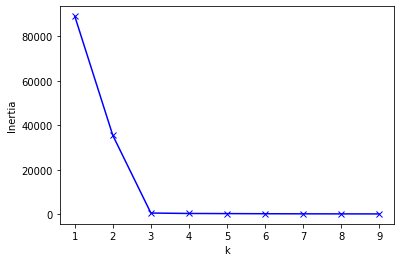

In [ ]:
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [ ]:
muslim_user.shape

(89,)

In [ ]:
# user 데이터와 merge 해서 데이터 추출
muslim_review_user = pd.merge(muslim_user, user_table, left_on='user', right_on='id', how='inner')
muslim_review_user.drop_duplicates(inplace=True)
print(muslim_review_user.shape)
muslim_review_user.reset_index(drop=True, inplace=True)
muslim_review_user.head()

(89, 4)


,user,id,gender,age
0,225842.0,225842,여,23
1,90292.0,90292,여,26
2,52663.0,52663,여,29
3,442382.0,442382,여,27
4,688218.0,688218,여,29


In [ ]:
#나이만 추출
muslim_only_user = muslim_review_user[["user","age"]]
#정규화
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(muslim_only_user)
muslim_only_user_normal= pd.DataFrame(features_normal ,columns=['nor_user', 'nor_age',])

muslim_review_nor_user = pd.concat([muslim_review_user, muslim_only_user_normal], axis=1)
muslim_review_nor_user.head()

,user,id,gender,age,nor_user,nor_age
0,225842.0,225842,여,23,0.238406,0.000000
1,90292.0,90292,여,26,0.095210,0.076923
2,52663.0,52663,여,29,0.055458,0.153846
3,442382.0,442382,여,27,0.467161,0.102564
4,688218.0,688218,여,29,0.726864,0.153846


In [ ]:
muslim_review_nor_user["gender_m"] = muslim_review_nor_user["gender"].apply(lambda x: 1 if x=='남' else 0 )
muslim_review_nor_user["gender_f"] = muslim_review_nor_user["gender"].apply(lambda x: 1 if x=='여' else 0 )

In [ ]:
muslim_review_nor_user.head()

,user,id,gender,age,nor_user,nor_age,gender_m,gender_f
0,225842.0,225842,여,23,0.238406,0.000000,0,1
1,90292.0,90292,여,26,0.095210,0.076923,0,1
2,52663.0,52663,여,29,0.055458,0.153846,0,1
3,442382.0,442382,여,27,0.467161,0.102564,0,1
4,688218.0,688218,여,29,0.726864,0.153846,0,1


In [ ]:
df_review_user = muslim_review_nor_user[["id","gender_m","gender_f"]]
df_review_user.head()

,id,gender_m,gender_f
0,225842,0,1
1,90292,0,1
2,52663,0,1
3,442382,0,1
4,688218,0,1


# 분석

In [ ]:
from sklearn.decomposition import TruncatedSVD

user_review_data = userID, storeID, rating, title

In [ ]:
user_store_data = muslim_review_table.copy()

In [ ]:
min(user_store_data["score"])

1.0

In [ ]:
user_store_rating = user_store_data.pivot_table('score',index='user', columns='store_name').fillna(min(user_store_data["score"]))
store_user_rating = user_store_rating.values.T
store_user_rating.shape

(25, 89)

In [ ]:
SVD = TruncatedSVD(n_components=3)

In [ ]:
matrix = SVD.fit_transform(store_user_rating)
matrix.shape

(25, 3)

In [ ]:
corr = np.corrcoef(matrix)
corr.shape

(25, 25)

In [ ]:
store_title = user_store_rating.columns
store_title_list = list(store_title)
store_title_list

['그랜드 키친',
 '깔리',
 '델리인디아',
 '델리팰리스',
 '루나아시아',
 '리틀인디아',
 '명동정',
 '모로코코 카페',
 '미가미',
 '미스터케밥',
 '바바인디아',
 '발우공양',
 '사마르칸트',
 '세븐스퀘어',
 '아건 레스토랑',
 '여우골초밥',
 '예티',
 '오샬',
 '오세계향',
 '옷살',
 '우스마니아',
 '이지인디아',
 '전주식당',
 '종로설렁탕',
 '카페 우즈베키스탄']

In [ ]:
store_title = user_store_rating.columns
store_title_list = list(store_title)
coffey_hands = store_title_list.index("예티")
print(coffey_hands) #인덱스 값 찾기

16


In [ ]:
corr_coffey_hands = corr[coffey_hands]
list(store_title[(corr_coffey_hands >= 0.9)])[:6] # 유사한 식당 10개

['그랜드 키친', '델리인디아', '델리팰리스', '루나아시아', '리틀인디아', '명동정']

Matrix Factorization


https://yamalab.tistory.com/92?category=747907



In [ ]:
import numpy as np


class MatrixFactorization():
    def __init__(self, R, k, learning_rate, reg_param, epochs, verbose=False):
        """
        :param R: rating matrix
        :param k: latent parameter
        :param learning_rate: alpha on weight update
        :param reg_param: beta on weight update
        :param epochs: training epochs
        :param verbose: print status
        """

        self._R = R
        self._num_users, self._num_items = R.shape
        self._k = k
        self._learning_rate = learning_rate
        self._reg_param = reg_param
        self._epochs = epochs
        self._verbose = verbose


    def fit(self):
        """
        training Matrix Factorization : Update matrix latent weight and bias

        참고: self._b에 대한 설명
        - global bias: input R에서 평가가 매겨진 rating의 평균값을 global bias로 사용
        - 정규화 기능. 최종 rating에 음수가 들어가는 것 대신 latent feature에 음수가 포함되도록 해줌.

        :return: training_process
        """

        # init latent features
        self._P = np.random.normal(size=(self._num_users, self._k))
        self._Q = np.random.normal(size=(self._num_items, self._k))

        # init biases
        self._b_P = np.zeros(self._num_users)
        self._b_Q = np.zeros(self._num_items)
        self._b = np.mean(self._R[np.where(self._R != 0)])

        # train while epochs
        self._training_process = []
        for epoch in range(self._epochs):

            # rating이 존재하는 index를 기준으로 training
            for i in range(self._num_users):
                for j in range(self._num_items):
                    if self._R[i, j] > 0:
                        self.gradient_descent(i, j, self._R[i, j])
            cost = self.cost()
            self._training_process.append((epoch, cost))

            # print status
            if self._verbose == True and ((epoch + 1) % 10 == 0):
                print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


    def cost(self):
        """
        compute root mean square error
        :return: rmse cost
        """

        # xi, yi: R[xi, yi]는 nonzero인 value를 의미한다.
        # 참고: http://codepractice.tistory.com/90
        xi, yi = self._R.nonzero()
        predicted = self.get_complete_matrix()
        cost = 0
        for x, y in zip(xi, yi):
            cost += pow(self._R[x, y] - predicted[x, y], 2)
        return np.sqrt(cost) / len(xi)


    def gradient(self, error, i, j):
        """
        gradient of latent feature for GD

        :param error: rating - prediction error
        :param i: user index
        :param j: item index
        :return: gradient of latent feature tuple
        """

        dp = (error * self._Q[j, :]) - (self._reg_param * self._P[i, :])
        dq = (error * self._P[i, :]) - (self._reg_param * self._Q[j, :])
        return dp, dq


    def gradient_descent(self, i, j, rating):
        """
        graident descent function

        :param i: user index of matrix
        :param j: item index of matrix
        :param rating: rating of (i,j)
        """

        # get error
        prediction = self.get_prediction(i, j)
        error = rating - prediction

        # update biases
        self._b_P[i] += self._learning_rate * (error - self._reg_param * self._b_P[i])
        self._b_Q[j] += self._learning_rate * (error - self._reg_param * self._b_Q[j])

        # update latent feature
        dp, dq = self.gradient(error, i, j)
        self._P[i, :] += self._learning_rate * dp
        self._Q[j, :] += self._learning_rate * dq


    def get_prediction(self, i, j):
        """
        get predicted rating: user_i, item_j
        :return: prediction of r_ij
        """
        return self._b + self._b_P[i] + self._b_Q[j] + self._P[i, :].dot(self._Q[j, :].T)


    def get_complete_matrix(self):
        """
        computer complete matrix PXQ + P.bias + Q.bias + global bias

        - PXQ 행렬에 b_P[:, np.newaxis]를 더하는 것은 각 열마다 bias를 더해주는 것
        - b_Q[np.newaxis:, ]를 더하는 것은 각 행마다 bias를 더해주는 것
        - b를 더하는 것은 각 element마다 bias를 더해주는 것

        - newaxis: 차원을 추가해줌. 1차원인 Latent들로 2차원의 R에 행/열 단위 연산을 해주기위해 차원을 추가하는 것.

        :return: complete matrix R^
        """
        return self._b + self._b_P[:, np.newaxis] + self._b_Q[np.newaxis:, ] + self._P.dot(self._Q.T)


    def print_results(self):
        """
        print fit results
        """

        print("User Latent P:")
        print(self._P)
        print("Item Latent Q:")
        print(self._Q.T)
        print("P x Q:")
        print(self._P.dot(self._Q.T))
        print("bias:")
        print(self._b)
        print("User Latent bias:")
        print(self._b_P)
        print("Item Latent bias:")
        print(self._b_Q)
        print("Final R matrix:")
        print(self.get_complete_matrix())
        print("Final RMSE:")
        print(self._training_process[self._epochs-1][1])


# run example
if __name__ == "__main__":
    # rating matrix - User X Item : (7 X 5)
    R = np.array([
        [1, 0, 0, 1, 3],
        [2, 0, 3, 1, 1],
        [1, 2, 0, 5, 0],
        [1, 0, 0, 4, 4],
        [2, 1, 5, 4, 0],
        [5, 1, 5, 4, 0],
        [0, 0, 0, 1, 0],
    ])

    # P, Q is (7 X k), (k X 5) matrix
    factorizer = MatrixFactorization(R, k=3, learning_rate=0.01, reg_param=0.01, epochs=300, verbose=True)
    factorizer.fit()
    factorizer.print_results()

Iteration: 10 ; cost = 0.2777
Iteration: 20 ; cost = 0.1938
Iteration: 30 ; cost = 0.1481
Iteration: 40 ; cost = 0.1203
Iteration: 50 ; cost = 0.1017
Iteration: 60 ; cost = 0.0880
Iteration: 70 ; cost = 0.0772
Iteration: 80 ; cost = 0.0684
Iteration: 90 ; cost = 0.0611
Iteration: 100 ; cost = 0.0549
Iteration: 110 ; cost = 0.0495
Iteration: 120 ; cost = 0.0449
Iteration: 130 ; cost = 0.0409
Iteration: 140 ; cost = 0.0372
Iteration: 150 ; cost = 0.0339
Iteration: 160 ; cost = 0.0309
Iteration: 170 ; cost = 0.0282
Iteration: 180 ; cost = 0.0257
Iteration: 190 ; cost = 0.0234
Iteration: 200 ; cost = 0.0212
Iteration: 210 ; cost = 0.0193
Iteration: 220 ; cost = 0.0175
Iteration: 230 ; cost = 0.0158
Iteration: 240 ; cost = 0.0143
Iteration: 250 ; cost = 0.0130
Iteration: 260 ; cost = 0.0118
Iteration: 270 ; cost = 0.0108
Iteration: 280 ; cost = 0.0098
Iteration: 290 ; cost = 0.0090
Iteration: 300 ; cost = 0.0083
User Latent P:
[[ 1.14921708 -0.11432974 -0.5352021 ]
 [ 0.51917197  0.96267725

# k-means

In [ ]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_review_user)
    kmeanModel.fit(df_review_user)
    inertia.append(kmeanModel.inertia_)

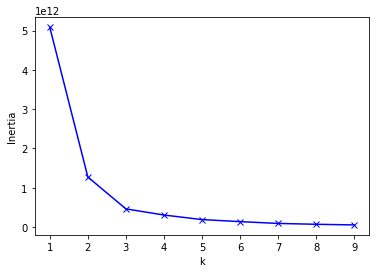

In [ ]:
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3).fit(features_normal)

In [ ]:
labels = pd.DataFrame(kmeans.labels_)
labeledColleges = pd.concat((muslim_review_user,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)

In [ ]:
labeledColleges.head()

,user,id,gender,age,gender_m,gender_f,labels
0,225842.0,225842,여,23,0,1,1
1,90292.0,90292,여,26,0,1,1
2,52663.0,52663,여,29,0,1,1
3,442382.0,442382,여,27,0,1,1
4,688218.0,688218,여,29,0,1,2


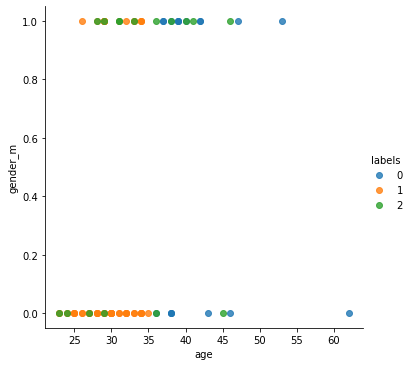

In [ ]:
sns.lmplot(x='age',y='gender_m',data=labeledColleges,hue='labels',fit_reg=False)

# 완성본

## import

In [52]:
import json
import pandas as pd
import numpy as np
import os
import random
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
# import sklearn.cluster.hierarchical as hclust
from sklearn import preprocessing
import seaborn as sns

DATA_FILE = "/gdrive/MyDrive/colab/data.json"
DUMP_FILE = "/gdrive/MyDrive/colab/dump.pkl"
MUSLIM_PATH = '/gdrive/MyDrive/colab/MyDF11.csv'
CATEGORY_PATH = '/gdrive/MyDrive/colab/category_count_data.csv'
REVIEW_PATH = '/gdrive/MyDrive/colab/review_data2.csv'

store_columns = (
    "id",  # 음식점 고유번호
    "store_name",  # 음식점 이름
    "branch",  # 음식점 지점 여부
    "area",  # 음식점 위치
    "tel",  # 음식점 번호
    "address",  # 음식점 주소
    "latitude",  # 음식점 위도
    "longitude",  # 음식점 경도
    "category",  # 음식점 카테고리
)

review_columns = (
    "id",  # 리뷰 고유번호
    "store",  # 음식점 고유번호
    "user",  # 유저 고유번호
    "score",  # 평점
    "content",  # 리뷰 내용
    "reg_time",  # 리뷰 등록 시간
)

menu_columns = (
    "id",
    "store",
    "menu_name",
    "price",
)

user_columns = (
    "id",
    "gender",
    "age",
)


def import_data(data_path=DATA_FILE):
    try:
        with open(data_path, encoding="utf-8") as f:
            data = json.loads(f.read())
    except FileNotFoundError as e:
        print(f"`{data_path}` 가 존재하지 않습니다.")
        exit(1)

    stores = []  # 음식점 테이블
    reviews = []  # 리뷰 테이블
    menus = [] # 메뉴 테이블
    users = [] # 유저 테이블
    menu_id = 0

    for d in data:
        categories = [c["category"] for c in d["category_list"]]
        if not categories:
            categories.append("알수없음")

        stores.append(
            [
                d["id"],
                d["name"],
                d["branch"],
                d["area"],
                d["tel"],
                d["address"],
                d["latitude"],
                d["longitude"],
                categories[0],
            ]
        )

        for review in d["review_list"]:
            r = review["review_info"]
            u = review["writer_info"]

            if "1900" < u["born_year"] < "2021":
              user_age = 2021 - int(u["born_year"]) + 1

              reviews.append(
                  [r["id"], d["id"], u["id"], r["score"], r["content"], r["reg_time"]]
              )
              users.append(
                  [u["id"], u["gender"], user_age]
              )

        for menu in d["menu_list"]:
            menus.append(
                [menu_id, d["id"], menu["menu"], menu["price"]]
            )
            menu_id +=1

    store_frame = pd.DataFrame(data=stores, columns=store_columns)
    review_frame = pd.DataFrame(data=reviews, columns=review_columns)
    memu_frame = pd.DataFrame(data=menus, columns=menu_columns)
    user_frame = pd.DataFrame(data=users, columns=user_columns)

    store_frame["category"].replace("", "알수없음", inplace=True)

    return {"stores": store_frame, "reviews": review_frame, "menus": memu_frame, "users":user_frame}


def dump_dataframes(dataframes):
    pd.to_pickle(dataframes, DUMP_FILE)


def load_dataframes():
    return pd.read_pickle(DUMP_FILE)


print("[*] Parsing data...")
raw_data = import_data()
print("[+] Done")

print("[*] Dumping data...")
dump_dataframes(raw_data)
print("[+] Done\n")

raw_data = load_dataframes()

CSV_MUSLIM = pd.read_csv(MUSLIM_PATH, engine='python', encoding='cp949')
# CSV_CATEGORY = pd.read_csv(CATEGORY_PATH, engine='python', encoding='cp949')
CSV_REVIEW = pd.read_csv(REVIEW_PATH, engine='python', encoding='cp949')

print(CSV_MUSLIM.info())
seoul_muslim_df = CSV_MUSLIM.copy(deep=True)
seoul_muslim_df = seoul_muslim_df[seoul_muslim_df.id.notnull()]
print(seoul_muslim_df)

#skD 식당
raw_store_table = raw_data["stores"].copy(deep=True)
store_table = raw_store_table[['id', 'store_name','address']]

# skd 리뷰
raw_review_table = raw_data["reviews"].copy(deep=True)
raw_review_table["store"].replace(159620, 159619, inplace=True)
raw_review_table["store"].replace(159622, 159619, inplace=True)
review_table = raw_review_table[['store','user','score']]
# review_table = CSV_REVIEW.copy(deep=True)

review_table = pd.merge(seoul_muslim_df, review_table, left_on="id", right_on='store', how='inner')
review_table = review_table[['store','user','score']]

# # 카테고리 replace 데이터
# category_table = CSV_CATEGORY.copy(deep=True)

# skd 유저
raw_user_table = raw_data["users"].copy(deep=True)
user_table = raw_user_table[['id','gender','age']]
user_table.drop_duplicates(inplace=True)

# gender string to bool
user_table["gender_m"] = user_table["gender"].apply(lambda x: 1 if x=='남' else 0 )
user_table["gender_f"] = user_table["gender"].apply(lambda x: 1 if x=='여' else 0 )

# reviews count
review_col = raw_review_table[['store','user','score']]
# muslim_review_nor_user = pd.concat([review_table, CSV_REVIEW])
df_users_with_reviews = review_col["user"].value_counts().rename_axis('user').reset_index(name='reviews')
df_user_review_cnt = pd.merge(user_table, df_users_with_reviews, left_on='id', right_on='user')
df_user_review_cnt.drop_duplicates(inplace=True)
df_user_review_cnt.reset_index(inplace=True)
print(df_user_review_cnt)

# user [id, gender, age, review_count]
user_review_df =  pd.merge(user_table, df_user_review_cnt, on="id", how="left")
user_review_df = user_review_df[["id", "gender_x", "age_x", "reviews"]]
user_review_df.columns = ["id", "gender", "age", "review_count"]
user_review_df.drop_duplicates(inplace=True)
print(user_review_df.info())

# normalization
df_scaler = df_user_review_cnt[["age","reviews"]]
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(df_scaler)
df_scaler_normal= pd.DataFrame(features_normal ,columns=['nor_age', 'nor_reviews'])
muslim_review_nor_user = pd.concat([df_user_review_cnt, df_scaler_normal], axis=1)
df_review_user = muslim_review_nor_user[["id","nor_age","gender_m","gender_f",'nor_reviews']]

# label : clustering
# df_without_id = df_review_user[["nor_age","gender_m","gender_f",'nor_reviews']]
temp = df_user_review_cnt[["age", "gender_m", "gender_f", "reviews"]]
# kmeans = KMeans(n_clusters=30).fit(df_without_id)
kmeans = KMeans(n_clusters=30).fit(temp)
labels = pd.DataFrame(kmeans.labels_)
labeledColleges = pd.concat((df_review_user,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)
print(labeledColleges.head())

# review [store, user, score, label]
review_df =  pd.merge(review_table, labeledColleges, how="left", left_on="user", right_on="id")
review_df = review_df[["store", "user", "score", "labels"]]
review_df.columns = ["id_store", "id_user", "score", "labels"]
print(review_df.info())

temp2 = labeledColleges[["id", "labels"]]
print(temp2.info())

for i in range(2000):
  rn = random.randint(0, 18978)
  review_df=review_df.append({"id_store":seoul_muslim_df.loc[random.randint(0, 133)]["id"], "id_user":temp2.loc[rn]["id"], "score":random.randint(1, 5), "labels":temp2.loc[rn]["labels"]}, ignore_index=True)
print(review_df.info())

[*] Parsing data...
[+] Done
[*] Dumping data...
[+] Done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       134 non-null    int64 
 1   id_store_img_1   134 non-null    int64 
 2   id_store_img_2   134 non-null    int64 
 3   id_store_img_3   134 non-null    int64 
 4   id_store         134 non-null    int64 
 5   store_name       134 non-null    object
 6   address_x        134 non-null    object
 7   id               134 non-null    int64 
 8   address_y        60 non-null     object
 9   category         134 non-null    object
 10  muslim_friendly  134 non-null    object
 11  tel              134 non-null    object
 12  working_time     134 non-null    object
 13  day_closed       85 non-null     object
 14  parking          134 non-null    object
 15  attractions      134 non-null    object
 16  active           134 

In [55]:
user_table.describe()

,id,age,gender_m,gender_f
count,18979.000000,18979.000000,18979.000000,18979.000000
mean,357814.865272,36.726909,0.647505,0.352495
std,268200.592974,9.562513,0.477760,0.477760
min,7.000000,4.000000,0.000000,0.000000
25%,135749.500000,30.000000,0.000000,0.000000
50%,290832.000000,35.000000,1.000000,0.000000
75%,559346.500000,43.000000,1.000000,1.000000
max,950331.000000,91.000000,1.000000,1.000000


In [49]:
category_table = category_table[["category", "Unnamed: 3"]]
category_table.columns = ["category", "to_replace"]
category_table.dropna(inplace=True)

In [50]:
category_table.to_replace.value_counts()

한식       726
해물       333
카페       243
양식       195
일식       116
중식        82
채식        47
분식        38
뷔페식       34
알수없음      30
아시아음식     27
인도음식      11
중동음식       8
터키음식       2
배달         1
Name: to_replace, dtype: int64

In [22]:
len(category_table)
for i in range(len(category_table)):
  raw_store_table["category"].replace(category_table.loc[i]['category'], category_table.loc[i]['to_replace'], inplace=True)
  copied_df["category"].replace(category_table.loc[i]['category'], category_table.loc[i]['to_replace'], inplace=True)

KeyError: ignored

In [28]:
CSV_MUSLIM

,Unnamed: 0,id_store_img_1,id_store_img_2,id_store_img_3,id_store,store_name,address_x,id,address_y,category,muslim_friendly,tel,working_time,day_closed,parking,attractions,active,image0,image1,image2,Unnamed: 20
0,0,1,2,3,1,우스마니아,서울특별시 용산구 이태원동 137-56,308561,서울시 용산구 이태원동 137-56,인도음식,무슬림 자가 인증,02-798-7155,11:00-22:00,NaN,X,"국립중앙박물관, 이태원 쇼핑거리",1,https://media-cdn.tripadvisor.com/media/photo-...,https://t1.daumcdn.net/cfile/tistory/99CEF14D5...,https://korean.visitseoul.net/comm/getImage?sr...,"INSERT INTO store_image_temp VALUES ('1','1','..."
1,2,4,5,6,3,미가미,서울특별시 서초구 서초동 1337-32 서초동 광일빌딩,155677,서울시 서초구 서초동 1337-32,일식,무슬림 프렌들리,02-522-6522,11:00-23:00,명절 연휴,O,"강남역, 선정릉",1,https://t1.daumcdn.net/cfile/tistory/99028E425...,http://www.menupan.com/restaurant/restimg/006/...,https://img1.daumcdn.net/thumb/R800x0/?scode=m...,"INSERT INTO store_image_temp VALUES ('4','3','..."
2,4,7,8,9,5,패밀리아,서울특별시 강남구 논현동 248-7 임피리얼 팰리스호텔 1층,430186,서울시 강남구 논현동 248-7 임피리얼 팰리스 호텔 2층,뷔페식,무슬림 프렌들리,02-3440-8090,07:00-22:0-,연중무휴,O,"봉은사, 코엑스, 선정릉",1,https://mp-seoul-image-production-s3.mangoplat...,https://media-cdn.tripadvisor.com/media/photo-...,https://www.imperialpalace.co.kr/img/dining/im...,"INSERT INTO store_image_temp VALUES ('7','5','..."
3,5,10,11,12,6,깔리,서울특별시 종로구 명륜4가 171,55195,서울특별시 종로구 명륜4가 170-3 2층,인도음식,무슬림 프렌들리,02-747-5050,12:00-21:30,NaN,X,"창덕궁과 후원, 창경궁, 대학로",1,https://media-cdn.tripadvisor.com/media/photo-...,https://media-cdn.tripadvisor.com/media/photo-...,https://s3-ap-northeast-1.amazonaws.com/dcrevi...,"INSERT INTO store_image_temp VALUES ('10','6',..."
4,8,13,14,15,9,세븐스퀘어,서울특별시 중구 태평로2가 23 더 플라자 2층,224459,서울특별시 중구 태평로2가 23-5,뷔페식,무슬림 프렌들리,02-310-7777,06:00-22:00,NaN,O,"덕수궁, 청계천, 명동",1,https://www.hoteltheplaza.com/sp4/img/4_1_seve...,https://www.hoteltheplaza.com/m/_resource/imag...,https://mblogthumb-phinf.pstatic.net/MjAyMDA2M...,"INSERT INTO store_image_temp VALUES ('13','9',..."


In [30]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   id_store  1084 non-null   int64
 1   id_user   1084 non-null   int64
 2   score     1084 non-null   int64
 3   labels    1084 non-null   int64
dtypes: int64(4)
memory usage: 34.0 KB


In [43]:
review_df.to_csv('/gdrive/MyDrive/colab/review_label_data2.csv', encoding='utf-8-sig')

In [ ]:
rn = random.randint(0, 18978)
type(temp.loc[rn]["id"])

numpy.int64

In [ ]:
# gender string to bool
raw_user_table["gender_m"] = raw_user_table["gender"].apply(lambda x: 1 if x=='남' else 0 )
raw_user_table["gender_f"] = raw_user_table["gender"].apply(lambda x: 1 if x=='여' else 0 )
# reviews cnt
muslim_review_nor_user = pd.concat([review_table, CSV_REVIEW])
df_users_with_reviews = muslim_review_nor_user["user"].value_counts().rename_axis('user').reset_index(name='reviews')
df_user_review_cnt = pd.merge(raw_user_table, df_users_with_reviews, left_on='id', right_on='user')
df_user_review_cnt.drop_duplicates(inplace=True)
df_user_review_cnt.reset_index(inplace=True)

,id,nor_age,gender_m,gender_f,nor_reviews,labels
0,68632,0.321839,1,0,0.262366,1
1,389728,0.287356,0,1,0.466667,0
2,68716,0.390805,0,1,0.126882,0
3,774353,0.528736,0,1,0.043011,0
4,115682,0.310345,1,0,0.131183,1


In [ ]:
# user [id, gender, age, review_count]
user_review_df =  pd.merge(user_table, df_user_review_cnt, on="id", how="left")
user_review_df = user_review_df[["id", "gender_x", "age_x", "reviews"]]
user_review_df.columns = ["id", "gender", "age", "review_count"]
user_review_df.drop_duplicates(inplace=True)
user_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18979 entries, 0 to 91352
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            18979 non-null  int64 
 1   gender        18979 non-null  object
 2   age           18979 non-null  int64 
 3   review_count  18979 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 741.4+ KB


In [ ]:
# normalization
df_scaler = df_user_review_cnt[["age","reviews"]]
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(df_scaler)
df_scaler_normal= pd.DataFrame(features_normal ,columns=['nor_age', 'nor_reviews'])
muslim_review_nor_user = pd.concat([df_user_review_cnt, df_scaler_normal], axis=1)
df_review_user = muslim_review_nor_user[["id","nor_age","gender_m","gender_f",'nor_reviews']]

df_without_id = df_review_user[["nor_age","gender_m","gender_f",'nor_reviews']]
kmeans = KMeans(n_clusters=3).fit(df_without_id)
labels = pd.DataFrame(kmeans.labels_)
labeledColleges = pd.concat((df_review_user,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)
labeledColleges.head()

,id,nor_age,gender_m,gender_f,nor_reviews,labels
0,68632,0.321839,1,0,0.262366,1
1,389728,0.287356,0,1,0.466667,0
2,68716,0.390805,0,1,0.126882,0
3,774353,0.528736,0,1,0.043011,0
4,115682,0.310345,1,0,0.131183,1


In [ ]:
# review [store, user, score, label]
review_df =  pd.merge(review_table, labeledColleges, how="left", left_on="user", right_on="id")
review_df = review_df[["store", "user", "score", "labels"]]
review_df.columns = ["id_store", "id_user", "score", "labels"]
review_df.tail(20)

for i in range(10):
  rn = random.randint(0, 18978)
  review_df=review_df.append({"id_store":copied_df.loc[random.randint(0, 133)]["id"], "id_user":labeledColleges.loc[rn]["id"], "score":random.randint(1, 5), "labels":labeledColleges.loc[rn]["labels"]}, ignore_index=True)
review_df.tail(20)

,id_store,id_user,score,labels
93337,460003,92077,5,2
93338,460004,79647,2,1
93339,460003,90754,1,0
93340,460046,27436,4,1
93341,460005,28032,5,1
93342,460033,74999,1,0
93343,460015,120808,3,2
93344,55195,23375,3,0
93345,293929,339990,1,0
93346,460028,46560,3,0


In [ ]:
for i in range(10):
  rn = random.randint(0, 18978)
  review_df=review_df.append({"id_store":copied_df.loc[random.randint(0, 133)]["id"], "id_user":labeledColleges.loc[rn]["id"], "score":random.randint(1, 5), "labels":labeledColleges.loc[rn]["labels"]}, ignore_index=True)
review_df.tail(20)

,id_store,id_user,score,labels
93347,169083.0,3153.0,3.0,0.0
93348,460006.0,592634.0,5.0,1.0
93349,355301.0,29491.0,2.0,0.0
93350,344831.0,917934.0,1.0,0.0
93351,460050.0,731461.0,4.0,2.0
93352,439701.0,49693.0,1.0,0.0
93353,279485.0,791637.0,1.0,2.0
93354,460045.0,788114.0,5.0,2.0
93355,460034.0,190725.0,4.0,0.0
93356,460012.0,390671.0,5.0,0.0


In [ ]:
user_review_count_df = review_table.groupby("user").count().rename_axis('store').reset_index(name="review_count")
user_review_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   store         18979 non-null  int64
 1   review_count  18979 non-null  int64
dtypes: int64(2)
memory usage: 296.7 KB


In [26]:
muslim_df = CSV_MUSLIM.copy(deep=True)

# SKD 식당 별 평균 값
review_grouped_df = review_table.groupby("store").mean().round(2)

# 무슬림 데이터와 머지
muslim_review_merged = pd.merge(muslim_df, review_grouped_df, how='left', left_on='id', right_on="store")

# store_clustered = pd.merge(copied_df, review_grouped_df, how='left', left_on='id_store_SKD', right_on="store")

print(muslim_review_merged.shape)
print(muslim_review_merged.info())
print(muslim_review_merged.head())
print(muslim_review_merged.tail())

(134, 23)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       134 non-null    int64  
 1   id_store_img_1   134 non-null    int64  
 2   id_store_img_2   134 non-null    int64  
 3   id_store_img_3   134 non-null    int64  
 4   id_store         134 non-null    int64  
 5   store_name       134 non-null    object 
 6   address_x        134 non-null    object 
 7   id               134 non-null    int64  
 8   address_y        60 non-null     object 
 9   category         134 non-null    object 
 10  muslim_friendly  134 non-null    object 
 11  tel              134 non-null    object 
 12  working_time     134 non-null    object 
 13  day_closed       85 non-null     object 
 14  parking          134 non-null    object 
 15  attractions      134 non-null    object 
 16  active           134 non-null    int64  
 17  image0

In [ ]:
category_count_df = category_table.category.value_counts().rename_axis('category').reset_index(name="count")
category_count_df

,category,count
0,하우스맥주,1
1,베트남쌀국수,1
2,닭날개,1
3,스시야,1
4,티하우스,1
...,...,...
1948,닭계장,1
1949,한우육회,1
1950,알탕,1
1951,참게,1


In [ ]:
category_count_df.to_csv("/gdrive/MyDrive/colab/category_count_data.csv", encoding="utf-8-sig")

In [ ]:
user_table.describe()

,id,age
count,91357.000000,91357.000000
mean,324468.592303,35.513283
std,255882.004260,8.626258
min,7.000000,4.000000
25%,127113.000000,30.000000
50%,255093.000000,33.000000
75%,469245.000000,40.000000
max,950331.000000,91.000000


## 전처리 및 클러스터링

In [ ]:
# 클러스터링
## 카테고리 클러스터링
copied_df = CSV_MUSLIM.copy(deep=True)[["id_store", "id", "category", "address_x"]]
copied_df.columns = ["id_store", "id_store_SKD", "category", "address"]

print(copied_df.category.value_counts(), "\n counts:", copied_df.category.value_counts().sum())

copied_df["col_인도음식"] = copied_df["category"].apply(lambda x: 1 if x=='인도음식' else 0 )
copied_df["col_한식"] = copied_df["category"].apply(lambda x: 1 if x=='한식' else 0 )
copied_df["col_양식"] = copied_df["category"].apply(lambda x: 1 if x=='양식' else 0 )
copied_df["col_터키음식"]  = copied_df["category"].apply(lambda x: 1 if x=='터키음식' else 0 )
copied_df["col_아시아음식"] = copied_df["category"].apply(lambda x: 1 if x=='아시아음식' else 0 )
copied_df["col_일식"] = copied_df["category"].apply(lambda x: 1 if x=='일식' else 0 )
copied_df["col_뷔페식"] = copied_df["category"].apply(lambda x: 1 if x=='뷔페식' else 0 )
copied_df["col_카페"] = copied_df["category"].apply(lambda x: 1 if x=='카페' else 0 )
copied_df["col_중식"] = copied_df["category"].apply(lambda x: 1 if x=='중식' else 0 )

copied_df.drop("category", 'columns', inplace=True)

## 주소 클러스터링
copied_df["area"] = copied_df["address"].str.split(" ").str[1]

copied_df["area_용산구"] = copied_df["area"].apply(lambda x: 1 if x=='용산구' else 0 )
copied_df["area_중구"] = copied_df["area"].apply(lambda x: 1 if x=='중구' else 0 )
copied_df["area_종로구"] = copied_df["area"].apply(lambda x: 1 if x=='종로구' else 0 )
copied_df["area_마포구"] = copied_df["area"].apply(lambda x: 1 if x=='마포구' else 0 )
copied_df["area_강남구"] = copied_df["area"].apply(lambda x: 1 if x=='강남구' else 0 )
copied_df["area_서대문구"] = copied_df["area"].apply(lambda x: 1 if x=='서대문구' else 0 )
copied_df["area_서초구"] = copied_df["area"].apply(lambda x: 1 if x=='서초구' else 0 )
copied_df["area_강서구"] = copied_df["area"].apply(lambda x: 1 if x=='강서구' else 0 )
copied_df["area_영등포구"] = copied_df["area"].apply(lambda x: 1 if x=='영등포구' else 0 )
copied_df["area_구로구"] = copied_df["area"].apply(lambda x: 1 if x=='구로구' else 0 )
copied_df["area_성북구"] = copied_df["area"].apply(lambda x: 1 if x=='성북구' else 0 )
copied_df["area_관악구"] = copied_df["area"].apply(lambda x: 1 if x=='관악구' else 0 )
copied_df["area_송파구"] = copied_df["area"].apply(lambda x: 1 if x=='송파구' else 0 )
copied_df["area_동대문구"] = copied_df["area"].apply(lambda x: 1 if x=='동대문구' else 0 )
copied_df["area_강북구"] = copied_df["area"].apply(lambda x: 1 if x=='강북구' else 0 )
copied_df["area_성동구"] = copied_df["area"].apply(lambda x: 1 if x=='성동구' else 0 )
copied_df["area_강동구"] = copied_df["area"].apply(lambda x: 1 if x=='강동구' else 0 )
copied_df["area_양천구"] = copied_df["area"].apply(lambda x: 1 if x=='양천구' else 0 )

copied_df.drop(["address", "area"], "columns", inplace=True)

# User Re-Index
## 1. copied_df review_table merge
muslim_review_merged_df = pd.merge(copied_df, review_table, how='left', left_on="id_store_SKD", right_on="store")

## 2. merge DF 에서 user 뽑고 중복 제거 및 null 제거
user_index_df = muslim_review_merged_df[["user"]]
user_index_df.drop_duplicates(inplace=True)
user_index_df.dropna(inplace=True)

## user_df 정렬
user_index_df.sort_values("user", inplace= True)

user_index_df.reset_index(inplace=True)
user_index_df.reset_index(inplace=True)

user_index_df.columns = ['id_user', 'index', 'user']

###############################################################

muslim_df = CSV_MUSLIM.copy(deep=True)

# review data 추가
# for a in range(2000):
#   review_table = review_table.append(
#     {"store":muslim_df.loc[random.randint(0, 133)]["id"], "user":user_table.loc[random.randint(0, 91397)]["id"], "score":random.randint(1, 5)}
#     , ignore_index=True
#   )

# SKD 식당 별 평균 값
review_grouped_df = review_table.groupby("store").mean().round(2)

# 무슬림 데이터와 머지
muslim_review_merged = pd.merge(muslim_df, review_grouped_df, how='left', left_on='id', right_on="store")

store_clustered = pd.merge(copied_df, review_grouped_df, how='left', left_on='id_store_SKD', right_on="store")

print(muslim_review_merged.shape)
print(muslim_review_merged.info())
print(muslim_review_merged.head())
print(muslim_review_merged.tail())

In [ ]:
muslim_df.describe()

,Unnamed: 0,id_store_img_1,id_store_img_2,id_store_img_3,id_store,id,active
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.0
mean,187.835821,204.261194,205.261194,206.261194,188.835821,395044.686567,1.0
std,135.301401,118.930252,118.930252,118.930252,135.301401,115779.281565,0.0
min,0.000000,1.000000,2.000000,3.000000,1.000000,44333.000000,1.0
25%,104.250000,100.750000,101.750000,102.750000,105.250000,362940.750000,1.0
50%,144.500000,206.500000,207.500000,208.500000,145.500000,460014.000000,1.0
75%,205.250000,306.250000,307.250000,308.250000,206.250000,460040.750000,1.0
max,488.000000,406.000000,407.000000,408.000000,489.000000,460074.000000,1.0


In [ ]:
temp_tb = review_table.copy(deep=True)
for i in range(10):
  rn = random.randint(0, 91397)
  temp_tb = temp_tb.append(
    {"store":muslim_review_merged.loc[random.randint(0, 133)]["id"], "user":user_table.loc[rn]["id"], "label":user_table.loc[rn]["label"], "score":random.randint(1, 5)}
    , ignore_index=True
  )

In [ ]:
review_table.to_csv('/gdrive/MyDrive/colab/review_data2.csv',encoding="utf-8-sig")